In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [5]:
df['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

#### Create Function that detect outlier

In [8]:
df_outlier = df.drop(['purpose','credit.policy','not.fully.paid'],axis=1)

In [70]:
index=[]
for item in df_outlier.columns:
    q = df_outlier[item].quantile([.25,.75]).values
    IQR = q[1]-q[0]
    batmin = q[0]-(IQR*1.5)
    batmax = q[1]+(IQR*1.5)
    index.append(df[(df[item]<batmin)|(df[item]>batmax)].index)


# Handling Imbalance Data :
#### using Undersampling

In [23]:
minority_data = df[df['not.fully.paid']==1]
mayority_data = df[df['not.fully.paid']==0]

In [24]:
index_for_mayority = np.random.choice(mayority_data.index, len(minority_data))

In [25]:
df_class_0 = df.loc[index_for_mayority]

In [26]:
undersampling_df = pd.concat([df_class_0, minority_data])

In [27]:
undersampling_df['not.fully.paid'].value_counts(normalize=True)

1    0.5
0    0.5
Name: not.fully.paid, dtype: float64

# Modelling

### Feature Engineering

In [28]:
undersampling_df = pd.get_dummies(undersampling_df,columns=['purpose'], drop_first=True)

In [29]:
target_1 = undersampling_df['not.fully.paid']
features_1 = undersampling_df.drop('not.fully.paid', axis=1)

In [30]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
def class_report_by_algo(x,y,model):
    X_train,X_test,y_train,y_test = tts(features_1,target_1, random_state=101)
    clf = model()
    clf.fit(X_train,y_train)
    clf.predict(X_test)
    
    pred_test=clf.predict(X_test)
    pred_train=clf.predict(X_train)
    print('Confusion Matrix')
    print(pd.DataFrame(confusion_matrix(y_test,pred_test), columns=['predict 0', 'predict 1'], index=['actual 0', 'actual 1']))
    print('====================================================================================')
    print('Class Report Data Test')
    print(classification_report(y_test,pred_test))
    print('====================================================================================')
    print('Class Report Data Train')
    print(classification_report(y_train,pred_train))    
    

In [32]:
class_report_by_algo(features_1, target_1, LogisticRegression)

Confusion Matrix
          predict 0  predict 1
actual 0        235        153
actual 1        193        186
Class Report Data Test
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       388
           1       0.55      0.49      0.52       379

   micro avg       0.55      0.55      0.55       767
   macro avg       0.55      0.55      0.55       767
weighted avg       0.55      0.55      0.55       767

Class Report Data Train
              precision    recall  f1-score   support

           0       0.60      0.63      0.62      1145
           1       0.61      0.58      0.60      1154

   micro avg       0.61      0.61      0.61      2299
   macro avg       0.61      0.61      0.61      2299
weighted avg       0.61      0.61      0.61      2299



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
class_report_by_algo(features_1, target_1, DecisionTreeClassifier)

Confusion Matrix
          predict 0  predict 1
actual 0        234        154
actual 1        169        210
Class Report Data Test
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       388
           1       0.58      0.55      0.57       379

   micro avg       0.58      0.58      0.58       767
   macro avg       0.58      0.58      0.58       767
weighted avg       0.58      0.58      0.58       767

Class Report Data Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1145
           1       1.00      1.00      1.00      1154

   micro avg       1.00      1.00      1.00      2299
   macro avg       1.00      1.00      1.00      2299
weighted avg       1.00      1.00      1.00      2299



In [34]:
class_report_by_algo(features_1, target_1, RandomForestClassifier)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Confusion Matrix
          predict 0  predict 1
actual 0        274        114
actual 1        192        187
Class Report Data Test
              precision    recall  f1-score   support

           0       0.59      0.71      0.64       388
           1       0.62      0.49      0.55       379

   micro avg       0.60      0.60      0.60       767
   macro avg       0.60      0.60      0.60       767
weighted avg       0.60      0.60      0.60       767

Class Report Data Train
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1145
           1       0.99      0.98      0.99      1154

   micro avg       0.99      0.99      0.99      2299
   macro avg       0.99      0.99      0.99      2299
weighted avg       0.99      0.99      0.99      2299



In [35]:
class_report_by_algo(features_1, target_1,GradientBoostingClassifier)

Confusion Matrix
          predict 0  predict 1
actual 0        231        157
actual 1        144        235
Class Report Data Test
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       388
           1       0.60      0.62      0.61       379

   micro avg       0.61      0.61      0.61       767
   macro avg       0.61      0.61      0.61       767
weighted avg       0.61      0.61      0.61       767

Class Report Data Train
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1145
           1       0.76      0.76      0.76      1154

   micro avg       0.76      0.76      0.76      2299
   macro avg       0.76      0.76      0.76      2299
weighted avg       0.76      0.76      0.76      2299



#### from all the model, the better precision and recall both in train and test is GradientBoostingClassifier

# Optim the model:


### for Logistic Regression: ROC Curve

In [86]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [87]:
proba_test = lr.predict_proba(X_test)[:,1]

NameError: name 'lr' is not defined

In [88]:
X_train,X_test,y_train,y_test = tts(features_1,target_1, random_state=101)
lr = LogisticRegression()
lr.fit(X_train,y_train)
prediction = lr.predict(X_test)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [89]:
proba_test = lr.predict_proba(X_test)[:,1]

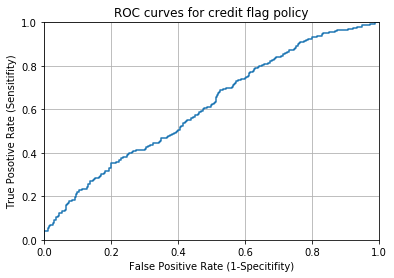

In [90]:
fpr,tpr,thresholds = metrics.roc_curve(y_test, proba_test)
plt.plot(fpr,tpr)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.title('ROC curves for credit flag policy')
plt.xlabel('False Positive Rate (1-Specitifity)')
plt.ylabel('True Posotive Rate (Sensitifity)')
plt.grid(True)

# Moving the Cut Off

In [92]:
proba = lr.predict_proba(X_test)
proba[:5]

array([[0.56202698, 0.43797302],
       [0.45573809, 0.54426191],
       [0.505674  , 0.494326  ],
       [0.61232453, 0.38767547],
       [0.49075837, 0.50924163]])

In [100]:
from sklearn.preprocessing import binarize
proba_class = binarize(proba, 0.3)[:,1]

In [101]:
print(classification_report(y_test,proba_class))

              precision    recall  f1-score   support

           0       0.74      0.05      0.10       388
           1       0.50      0.98      0.66       379

   micro avg       0.51      0.51      0.51       767
   macro avg       0.62      0.52      0.38       767
weighted avg       0.62      0.51      0.38       767



In [102]:
pd.DataFrame(confusion_matrix(y_test,proba_class), columns=['predict 0', 'predict 1'], index=['actual 0', 'actual 1'])

,predict 0,predict 1
actual 0,20,368
actual 1,7,372
